In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import datetime as dt
from textblob import TextBlob
from nltk.corpus import stopwords

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
df = pd.read_csv("VacineCard_Nohas.csv")

In [3]:
pd.set_option('display.max_columns', None)
df

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1442276954154045444,1442276647294550016,2021-09-26 16:56:36 Pacific Summer Time,2021-09-26,16:56:36,-700,1437118324379426819,josecru16191249,josecruz,NaN,Here’s my vaccine card https://t.co/Zfb1P81jSE,en,[],[],['https://pbs.twimg.com/media/FAP_Pr1WEAIOrap....,0,1,1,[],[],https://twitter.com/josecru16191249/status/144...,False,NaN,1,https://pbs.twimg.com/media/FAP_Pr1WEAIOrap.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1442275938746601478,1442275938746601478,2021-09-26 16:52:34 Pacific Summer Time,2021-09-26,16:52:34,-700,415669188,ilovetaguig1,I Love Taguig,NaN,"𝗙𝗼𝗿 𝗦𝗲𝗽𝘁. 𝟮𝟳, 𝟮𝟬𝟮𝟭 (𝗠𝗼𝗻𝗱𝗮𝘆), those who missed ...",en,[],[],['https://pbs.twimg.com/media/FAP-UobUYAIYorx....,4,3,4,[],[],https://twitter.com/IloveTaguig1/status/144227...,False,NaN,1,https://pbs.twimg.com/media/FAP-UobUYAIYorx.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1442275271936143361,1442175397874094081,2021-09-26 16:49:55 Pacific Summer Time,2021-09-26,16:49:55,-700,1312633873449119745,bushidoshi,Best Year Ever,NaN,@GirlFuturist @brucewilson Arts degree with va...,en,[],[],[],0,0,5,[],[],https://twitter.com/bushidoshi/status/14422752...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'GirlFuturist', 'name': '𝙶𝚒𝚛𝚕...",NaN,NaN,NaN,NaN
3,1442275186338775045,1441897092017016832,2021-09-26 16:49:35 Pacific Summer Time,2021-09-26,16:49:35,-700,962827494876381185,puregoldj,Jay H Goldberg,NaN,@chipfranklin @POTUS What exactly is a « vacci...,en,[],[],[],2,0,0,[],[],https://twitter.com/puregoldj/status/144227518...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'chipfranklin', 'name': 'Chip...",NaN,NaN,NaN,NaN
4,1442275141791076357,1442220063461818377,2021-09-26 16:49:24 Pacific Summer Time,2021-09-26,16:49:24,-700,22237383,wordsleadmeon,Court 🐔🍷😷 (🏡549 for my 5yo nieces. 2xPfizer'd),NaN,@prairiecentrist In BC he wouldn't even be all...,en,[],[],[],2,0,2,[],[],https://twitter.com/wordsleadmeon/status/14422...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'prairiecentrist', 'name': 'J...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20005,1436152800610750464,1436136291717029894,2021-09-09 19:21:24 Pacific Summer Time,2021-09-09,19:21:24,-700,1066107834595778560,amoore12321_,Andrew Moore (OLED Model) #MetroidDread #Steam...,NaN,@Chilly_MIV Yeah ikr and I lost my vaccine car...,en,[],[],[],0,0,1,[],[],https://twitter.com/amoore12321_/status/143615...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Chilly_MIV', 'name': 'Chilly...",NaN,NaN,NaN,NaN
20006,1436152607848939524,1436152607848939524,2021-09-09 19:20:38 Pacific Summer Time,2021-09-09,19:20:38,-700,173736223,casadormusic,casador,NaN,i hate to break it to you but buying a fake va...,en,[],[],[],0,0,0,[],[],https://twitter.com/CasadorMusic/status/143615...,False,https://twitter.com/justinbaragona/status/1433...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
20007,1436152082273378304,1436106615934144516,2021-09-09 19:18:33 Pacific Summer Time,2021-09-09,19:18:33,-700,40085439,tlcannady,Teresa Cannady,NaN,@Martina Did you ask to see his vaccine card. ...,en,[],[],[],0,0,0,[],[],https://twitter.com/tlcannady/status/143615208...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Martina', 'name': 'Martina N...",NaN,NaN,NaN,NaN
20008,1436151255743803392,1436151253701120002,2021-09-09 19:15:16 Pacific Summer Time,2021-09-09,19:15:16,-700,1368392075667005445,kerrylorkovic,Kerry Elliott Lorkovic,NaN,"(cont’d) “Bring your vaccine card, picture ide...",en,[],[],[],0,0,0,[],[],https://twitter.com/KerryLorkovic/status/14361...,False,NaN,0,NaN,N

In [4]:
pd.set_option('display.max_colwidth', -1)

C:\Users\Zola\AppData\Local\Temp/ipykernel_6280/3652881321.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [5]:
# acquires both tweet polarity and subjectivity
df['sentiment'] = df['tweet'].apply(lambda tweet: TextBlob(tweet).sentiment)

In [6]:
# only polarity
df['polarity_score'] = df['tweet'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)


In [7]:
df['polarity'] = df['polarity_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

In [8]:

df['polarity'].value_counts()

positive    8549
neutral     6657
negative    4804
Name: polarity, dtype: int64

In [9]:

df['polarity_score'].mean()

0.053509527300058105

In [10]:
# only subjectivity
df['subjectivity_score'] = df['tweet'].apply(lambda tweet: TextBlob(tweet).sentiment.subjectivity)

In [11]:
df['subjectivity'] = df['subjectivity_score'].apply(lambda x: 'subjective' if x>0.5 else ('objective' if x < 0.5 else 'neutral'))

In [12]:
df['subjectivity'].value_counts()

objective     12479
subjective    6441 
neutral       1090 
Name: subjectivity, dtype: int64

In [13]:
# sort the likes in order
likesorder=df[['date','likes_count','polarity_score','tweet']].sort_values(by=['likes_count'],ascending=False)
likesorder.set_index('date').head(10)

,likes_count,polarity_score,tweet
date,,,
2021-09-15,393602,-0.500000,I work at a thrift store and found this vaccine card from 1956. Felt weirdly timely https://t.co/pjo8nhwwUL
2021-09-12,321636,0.600000,A vaccine card that fits in your wallet?? With a QR code?? Must be nice living in a country ran by ppl with sense.
2021-09-18,39285,0.056250,I think it’s hilarious people think the government has put tracking chips in the vaccine. You mean the same government that couldn’t even make the vaccine card small enough to fit in your wallet? That government?
2021-09-25,34132,-0.125000,"If you didn't use your ""religion"" to object to other vaccines or medications before, you don't get to pull that card now."
2021-09-23,17048,-0.200000,"Got a letter from my employer a few days ago that suggested taking vitamins C,D and zinc and included a gift card. That's all. I think I know where they stand on vaccine mandates."
2021-09-17,12124,-0.200000,Study Finds Virus Frequently Fooled By Fake Vaccine Card https://t.co/bRI5x5ipVW https://t.co/2zGWYtifl5
2021-09-13,10243,0.262121,"BREAKING: Fox News host Bill Hemmer throws a fit, storms out of a New York City restaurant because they require a picture ID with his vaccine card, and he tried to enter by showing his “Amex and Visa cards.” RT TO THANK THE RESTAURANT FOR SETTING FOX’S ENTITLED JERK STRAIGHT!"
2021-09-12,8303,0.000000,@Kemz876_ Me with my vaccine card in the US. https://t.co/8RNc7MazBX
2021-09-13,6773,-0.500000,"Sorry I forgot my vaccine card, can I show you my oversized balls instead?"


In [14]:

# function to split up words of each tweet
def clean_text(text):
    tweet = re.sub("(@_?[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split() # removes special characters
    filtered_words = [word for word in tweet if word not in stopwords.words('english')] # acquires non-stopwords words
    return filtered_words

In [15]:

df['tweet_clean'] = df['tweet'].map(lambda x: clean_text(str(x)))

In [16]:
# acquires word counts
word_freq=df['tweet_clean'].apply(lambda x: pd.value_counts(x)).sum(axis = 0)

In [17]:
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=16)

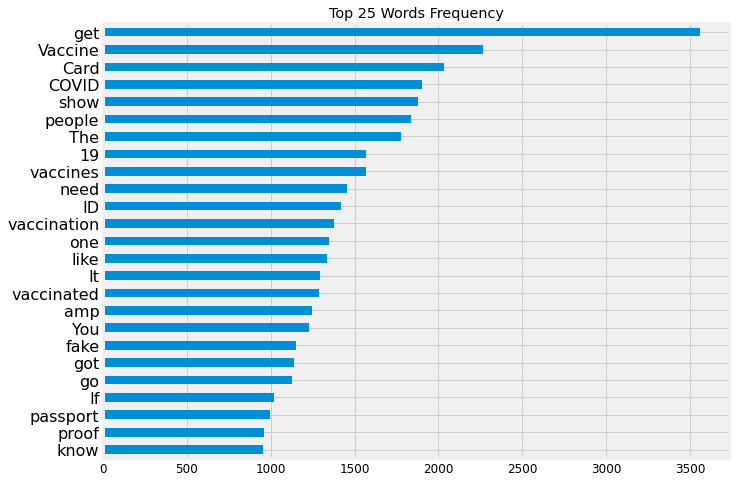

In [18]:
# graph top words, skips past top 3 because those are pic twitter and com from pic.twitter.com being part
# of every tweet that includes a photo
imp_word=word_freq.sort_values(ascending=False)[3:28].sort_values(ascending=True)

imp_word.plot(kind = "barh",figsize=(10,8))
plt.title("Top 25 Words Frequency");

In [19]:
# acquires mention counts
mentions_freq=df['mentions'].apply(lambda x: pd.value_counts(x)).sum(axis = 0)

In [20]:
mentions_freq.sort_values(ascending=False)

[]                                                                                                                                                                                                                                                               37298.0
[{'screen_name': 'youtube', 'name': 'youtube', 'id': '10228272'}]                                                                                                                                                                                                2795.0 
[{'screen_name': 'uoftpharmacy', 'name': 'leslie dan faculty of pharmacy', 'id': '369128114'}, {'screen_name': 'immunizedotca', 'name': 'immunize canada', 'id': '57703513'}, {'screen_name': 'anxiety_canada', 'name': 'anxiety canada', 'id': '190854092'}]    2024.0 
[{'screen_name': 'yahoo', 'name': 'yahoo', 'id': '19380829'}]                                                                                                                                                

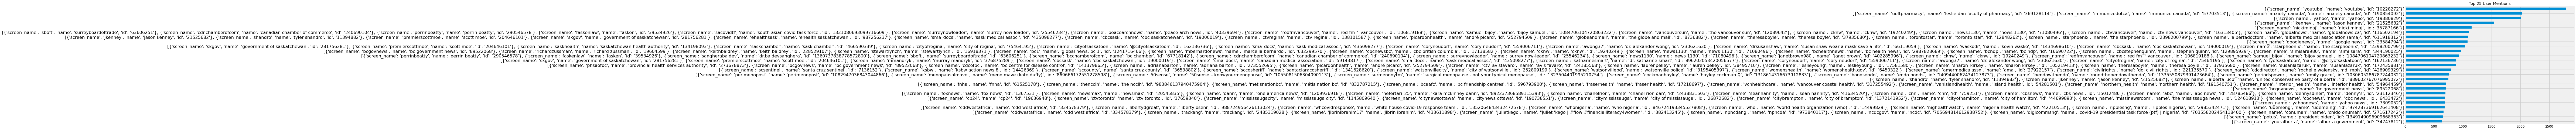

In [21]:
imp_mentions=mentions_freq.sort_values(ascending=False)[1:26].sort_values(ascending=True)

imp_mentions.plot(kind = "barh",figsize=(10,8))
plt.title("Top 25 User Mentions");

In [22]:
# establish timezone of tweets is all EDT
df.timezone.value_counts()

-700    20010
Name: timezone, dtype: int64

In [23]:
df.retweet.value_counts()

False    20010
Name: retweet, dtype: int64

In [24]:
df['Datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df = df.set_index('Datetime')

In [25]:
df.sort_index(inplace=True)

In [26]:
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,sentiment,polarity_score,polarity,subjectivity_score,subjectivity,tweet_clean
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-09-09 19:15:00,1436151190845378565,1436133157137420289,2021-09-09 19:15:00 Pacific Summer Time,2021-09-09,19:15:00,-700,169369923,webduelist,webduelist,NaN,"@SynthLexic @ClarenCovfefe No, its not the vaccine, its the vaccine card that is the problem, its the you can't do this or that unless you have this piece or paper and registered. Its the government trying to mandate you can't employee this person because they don't have this paper",en,[],[],[],1,0,1,[],[],https://twitter.com/webduelist/status/1436151190845378565,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'SynthLexic', 'name': 'LexiWhereThisGoes', 'id': '18341213'}, {'screen_name': 'ClarenCovfefe', 'name': 'greenleaf22', 'id': '989550391078535168'}]",NaN,NaN,NaN,NaN,"(0.0, 0.0)",0.000000,neutral,0.000000,objective,"[No, vaccine, vaccine, card, problem, unless, piece, paper, registered, Its, government, trying, mandate, employee, person, paper]"
2021-09-09 19:15:16,1436151255743803392,1436151253701120002,2021-09-09 19:15:16 Pacific Summer Time,2021-09-09,19:15:16,-700,1368392075667005445,kerrylorkovic,Kerry Elliott Lorkovic,NaN,"(cont’d) “Bring your vaccine card, picture identification and a mask if you're planning on having dinner! The unvaccinated can still get genital warts but not crawfish etouffee.”",en,[],[],[],0,0,0,[],[],https://twitter.com/KerryLorkovic/status/1436151255743803392,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,"(0.0, 0.0)",0.000000,neutral,0.000000,objective,"[cont, Bring, vaccine, card, picture, identification, mask, planning, dinner, The, unvaccinated, still, get, genital, warts, crawfish, etouffee]"
2021-09-09 19:18:33,1436152082273378304,1436106615934144516,2021-09-09 19:18:33 Pacific Summer Time,2021-09-09,19:18:33,-700,40085439,tlcannady,Teresa Cannady,NaN,@Martina Did you ask to see his vaccine card. I thought that everyone was required to show one to get in.,en,[],[],[],0,0,0,[],[],https://twitter.com/tlcannady/status/1436152082273378304,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Martina', 'name': 'Martina Navratilova', 'id': '506429053'}]",NaN,NaN,NaN,NaN,"(0.0, 0.0)",0.000000,neutral,0.000000,objective,"[Did, ask, see, vaccine, card, I, thought, everyone, required, show, one, get]"
2021-09-09 19:20:38,1436152607848939524,1436152607848939524,2021-09-09 19:20:38 Pacific Summer Time,2021-09-09,19:20:38,-700,173736223,casadormusic,casador,NaN,i hate to break it to you but buying a fake vaccine card isn’t really law-abiding…,en,[],[],[],0,0,0,[],[],https://twitter.com/CasadorMusic/status/1436152607848939524,False,https://twitter.com/justinbaragona/status/1433588541745999873,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,"(-0.3666666666666667, 0.7000000000000001)",-0.366667,negative,0.700000,subjective,"[hate, break, buying, fake, vaccine, card, really, law, abiding]"
2021-09-09 19:21:24,1436152800610750464,1436136291717029894,2021-09-09 19:21:24 Pacific Summer Time,2021-09-09,19:21:24,-700,1066107834595778560,amoore12321_,Andrew Moore (OLED Model) #MetroidDread #SteamDeck,NaN,@Chilly_MIV Yeah ikr and I lost my vaccine card :( and it’s a pain in the ass to get a new one,en,[],[],[],0,0,1,[],[],https://twitter.com/amoore12321_/status/1436152800610750464,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Chilly_MIV', 'name': 'Chilly MIV', 'id': '1321595179166564354'}]",NaN,NaN,NaN,NaN,"(-0.3068181818181818, 0.7272727272727273)",-0.306818,negative,0.727273,subjective,"[MIV, Yeah, ikr, I, lost, vaccine, card, pain, ass, get, new, one]"


In [27]:
hours_avg=df[['replies_count','retweets_count','likes_count','polarity_score','subjectivity_score']].groupby(df.index.hour).mean()
hours_avg

,replies_count,retweets_count,likes_count,polarity_score,subjectivity_score
Datetime,,,,,
0,0.741627,1.727273,5.698565,0.037340,0.328595
1,0.853786,0.665796,3.919060,0.026253,0.347657
2,0.687500,1.664773,4.284091,0.025064,0.333934
3,0.976804,2.180412,7.827320,0.052629,0.339576
4,1.241197,1.140845,6.677817,0.070630,0.343601
5,1.926081,5.426778,30.128312,0.039570,0.369328
6,2.443609,1.943072,11.306122,0.061074,0.382810
7,2.358779,2.677481,17.511450,0.049182,0.374138
8,1.582494,2.466305,15.776143,0.080928,0.359039


In [28]:
hours_avg.reset_index(inplace=True)

In [29]:

hours_avg

,Datetime,replies_count,retweets_count,likes_count,polarity_score,subjectivity_score
0,0,0.741627,1.727273,5.698565,0.037340,0.328595
1,1,0.853786,0.665796,3.919060,0.026253,0.347657
2,2,0.687500,1.664773,4.284091,0.025064,0.333934
3,3,0.976804,2.180412,7.827320,0.052629,0.339576
4,4,1.241197,1.140845,6.677817,0.070630,0.343601
5,5,1.926081,5.426778,30.128312,0.039570,0.369328
6,6,2.443609,1.943072,11.306122,0.061074,0.382810
7,7,2.358779,2.677481,17.511450,0.049182,0.374138
8,8,1.582494,2.466305,15.776143,0.080928,0.359039
9,9,2.256589,4.527132,16.133333,0.052661,0.359026


In [30]:
hours_avg = hours_avg.set_index('Datetime')
hours_avg.sort_index(inplace=True)
hours_avg

,replies_count,retweets_count,likes_count,polarity_score,subjectivity_score
Datetime,,,,,
0,0.741627,1.727273,5.698565,0.037340,0.328595
1,0.853786,0.665796,3.919060,0.026253,0.347657
2,0.687500,1.664773,4.284091,0.025064,0.333934
3,0.976804,2.180412,7.827320,0.052629,0.339576
4,1.241197,1.140845,6.677817,0.070630,0.343601
5,1.926081,5.426778,30.128312,0.039570,0.369328
6,2.443609,1.943072,11.306122,0.061074,0.382810
7,2.358779,2.677481,17.511450,0.049182,0.374138
8,1.582494,2.466305,15.776143,0.080928,0.359039


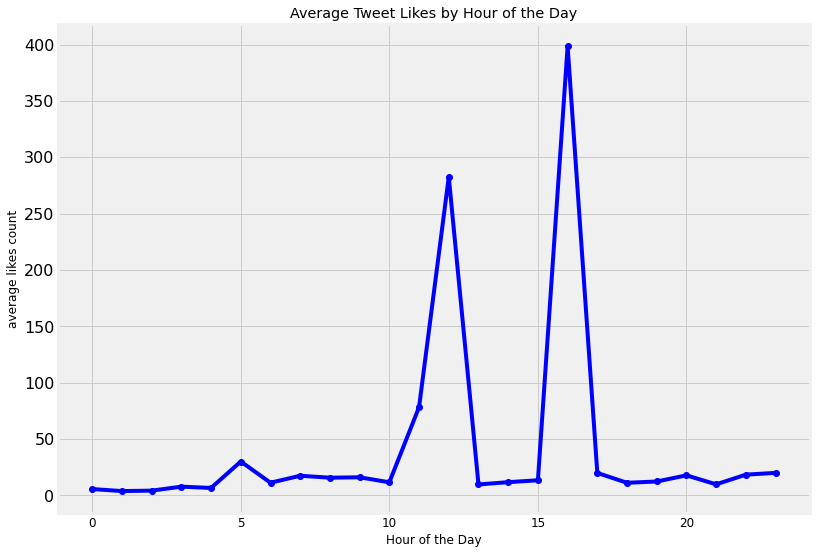

In [31]:
plt.figure(figsize=(12,9))
plt.plot(hours_avg['likes_count'],color='blue',marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('average likes count') 
plt.title('Average Tweet Likes by Hour of the Day');

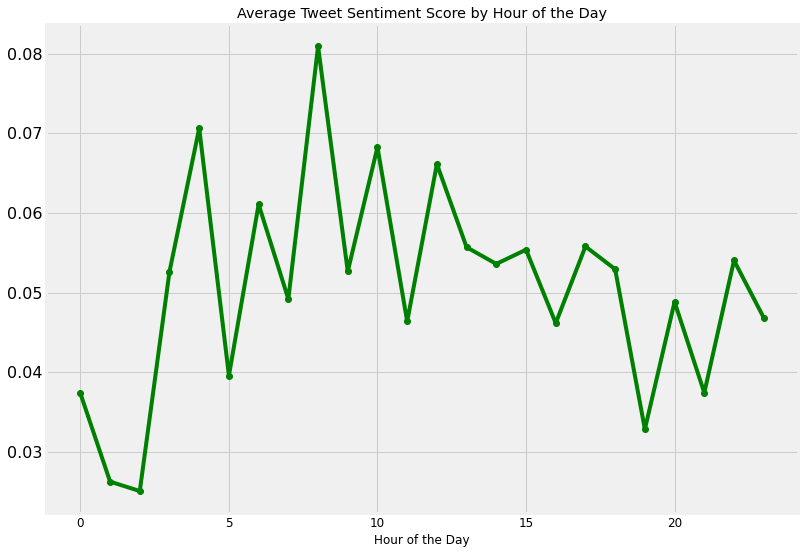

In [32]:
plt.figure(figsize=(12,9))
plt.plot(hours_avg['polarity_score'],color='green',marker='o')
plt.xlabel('Hour of the Day') 
plt.title('Average Tweet Sentiment Score by Hour of the Day');

In [35]:

months_avg=df[['replies_count','retweets_count','likes_count','polarity_score','subjectivity_score']].resample('M').mean()
months_avg

,replies_count,retweets_count,likes_count,polarity_score,subjectivity_score
Datetime,,,,,
2021-09-30,1.616142,7.969015,52.989105,0.05351,0.372178


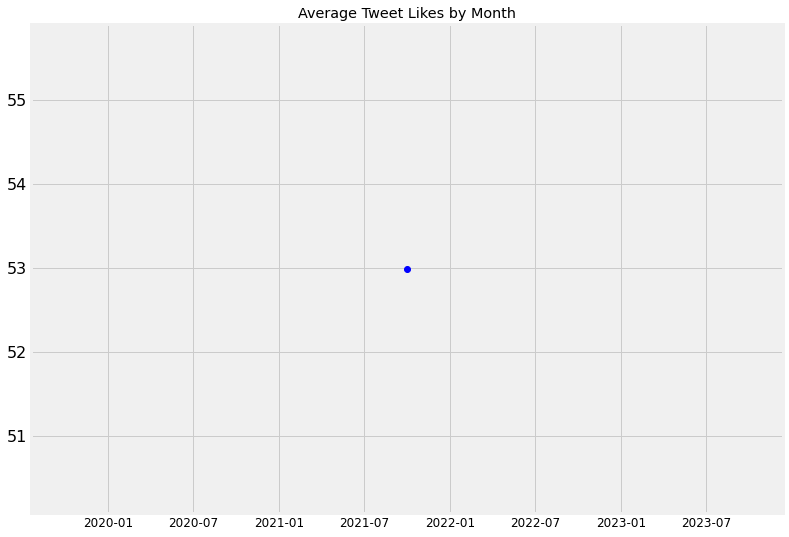

In [36]:
plt.figure(figsize=(12,9))
plt.plot(months_avg['likes_count'],color='blue',marker='o')
plt.title('Average Tweet Likes by Month');

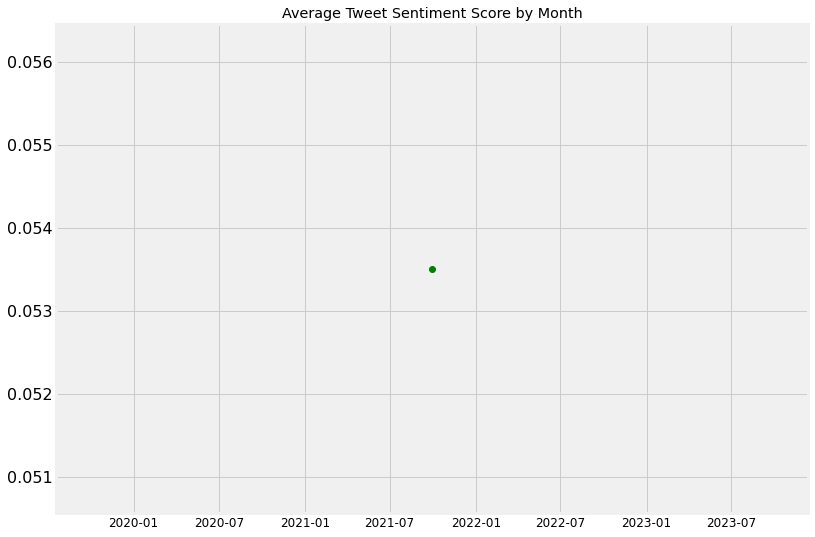

In [37]:

plt.figure(figsize=(12,9))
plt.plot(months_avg['polarity_score'],color='green',marker='o')
plt.title('Average Tweet Sentiment Score by Month');

In [57]:
week_df = df[['replies_count','retweets_count','likes_count','polarity_score','subjectivity_score']].groupby(df.index.weekday).mean()

In [54]:
# label each day of week in order so it will be sorted this way rather than alphabetically
week_df.at['Sunday', 'sort'] = 1
week_df.at['Monday', 'sort'] = 2
week_df.at['Tuesday', 'sort'] = 3
week_df.at['Wednesday', 'sort'] = 4
week_df.at['Thursday', 'sort'] = 5
week_df.at['Friday', 'sort'] = 6
week_df.at['Saturday', 'sort'] = 7

In [ ]:
week_df=week_df.sort_values(by=['sort'])

In [58]:
week_df

,replies_count,retweets_count,likes_count,polarity_score,subjectivity_score
Datetime,,,,,
0,1.632728,2.939403,14.936635,0.069542,0.360908
1,1.600078,1.345794,7.165888,0.052109,0.355423
2,2.108985,25.105241,182.150582,0.054866,0.367138
3,1.282746,2.300557,13.687941,0.043586,0.367517
4,1.020872,1.857105,12.372491,0.039284,0.386805
5,1.654450,4.870318,39.254531,0.057611,0.380491
6,2.253482,21.191504,130.524721,0.059754,0.382293


TypeError: 'value' must be an instance of str or bytes, not a int

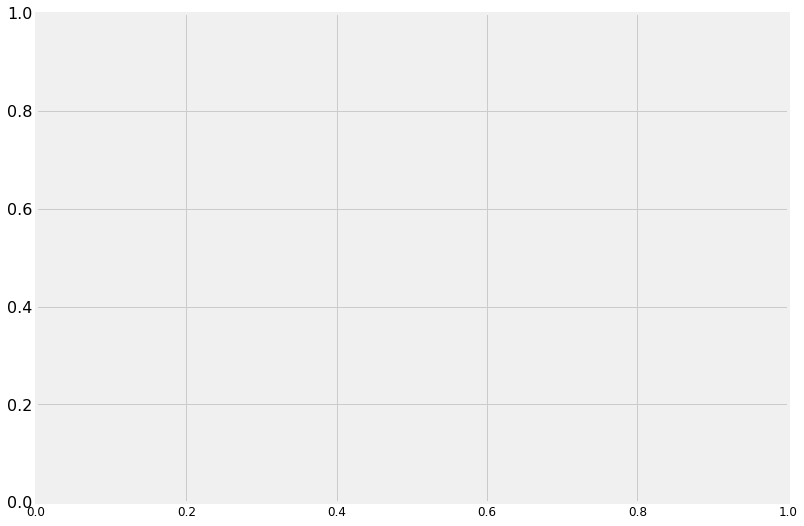

In [44]:
plt.figure(figsize=(12,9))
plt.plot(week_df['likes_count'],color='blue',marker='o')
plt.title('Average Tweet Likes by Day of the Week');

TypeError: 'value' must be an instance of str or bytes, not a int

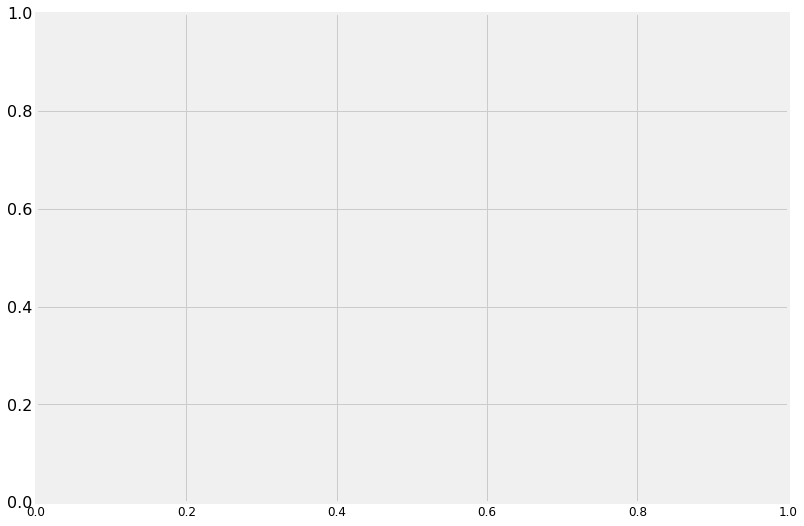

In [45]:
plt.figure(figsize=(12,9))
plt.plot(week_df['polarity_score'],color='green',marker='o')
plt.title('Average Tweet Sentiment Score by Day of the Week');